In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

* We have loaded the necessary libraries above
* Now let's load the data

In [5]:
df = pd.read_csv("./dataset_Facebook.csv", delimiter = ";")

features = ["Category",
            "Page total likes",
            "Type",
            "Post Month",
            "Post Hour",
            "Post Weekday",
            "Paid"]


df[features].head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [6]:
outcomes=  ["Lifetime Post Total Reach",
            "Lifetime Post Total Impressions",
            "Lifetime Engaged Users",
            "Lifetime Post Consumers",
            "Lifetime Post Consumptions",
            "Lifetime Post Impressions by people who have liked your Page",
            "Lifetime Post reach by people who like your Page",
            "Lifetime People who have liked your Page and engaged with your post",
            "comment",
            "like",
            "share",
            "Total Interactions"]

df[outcomes].head()

print(df[outcomes[-3:]].head().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    like &  share &  Total Interactions \\
\midrule
0 &    79.0 &   17.0 &                 100 \\
1 &   130.0 &   29.0 &                 164 \\
2 &    66.0 &   14.0 &                  80 \\
3 &  1572.0 &  147.0 &                1777 \\
4 &   325.0 &   49.0 &                 393 \\
\bottomrule
\end{tabular}



In [14]:



# convert a string variable to a categorical one
#types = list(set(df["Type"]))
#to_categorical = {types[i]:i for i in range(len(types))}
#df["Type"] = df["Type"].apply(lambda x: to_categorical[x])

df[["Type"]] = df[["Type"]].apply(LabelEncoder().fit_transform)

df.head()




,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Now let's prepare the data by cleaning it up and choosing the relevant column we would like to predict

We can now use the bootstrap to find an approximation of the bias and the variance

bins:[(8.999, 190.2], (1105.2, 1612.8], (8.999, 190.2], (646.8, 857.4], (388.4, 478.6], ..., (646.8, 857.4], (646.8, 857.4], (478.6, 555.0], (555.0, 646.8], (555.0, 646.8]]
Length: 495
Categories (10, interval[float64]): [(8.999, 190.2] < (190.2, 302.8] < (302.8, 388.4] < (388.4, 478.6] ... (646.8, 857.4] < (857.4, 1105.2] < (1105.2, 1612.8] < (1612.8, 11328.0]]
   Lifetime Post Consumers  like
0                        0    73
1                        8   113
2                        0    61
3                        6   252
4                        3   205


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


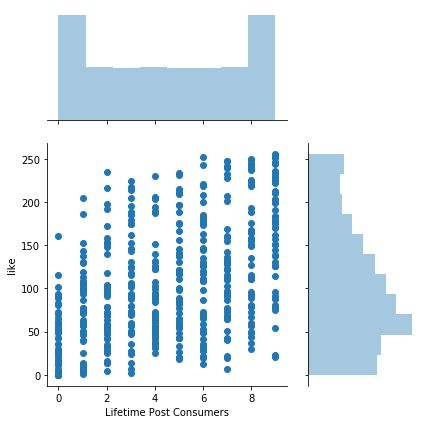

In [12]:
df = df.dropna()

outcomes_of_interest = ["Lifetime Post Consumers", "like"]
n_bins = 10

X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

#print X_df.head().to_latex()

#print y_df.values
bins =  pd.qcut(y_df[outcomes_of_interest[0]].values,n_bins)
print("bins:" + str(bins))
y_df = df[outcomes_of_interest].copy()
y_df[outcomes_of_interest[0]] = bins

y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)


print(y_df.head())

X = X_df.values
y = y_df.values.T[0]

# # import seaborn as sns

y_df['id'] = range(1, len(df) + 1)

y_df.head()
# sns_plot = sns.lmplot(x="id", y= attribute, data=y_df, fit_reg=False, aspect = 2)

# sns_plot.savefig("scaterplot_lpc.png",bbox_inches='tight')
# sns_plot.savefig("scaterplot_lpc.pdf",bbox_inches='tight')


sns_plot = sns.jointplot(x="Lifetime Post Consumers", y="like", data=y_df, ratio = 2)

sns_plot.savefig("joint_plot.png",bbox_inches='tight')
sns_plot.savefig("joint_plot.pdf",bbox_inches='tight')

# sns.distplot(y, kde=False, rug=True)

sns_plot.savefig("histogram_lpc.png",bbox_inches='tight')
sns_plot.savefig("histogram_lpc.pdf",bbox_inches='tight')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators = 2000,max_depth = 4)

dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y,dummy_clf.predict(X))))



Now let's train the regressor on the whole dataset

In [ ]:
clf = ExtraTreesClassifier(n_estimators = 20000,max_depth = 4)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')
